# **A simple nueral network for multiclass classification problem on mnist fashion dataset, which contains 10 classes ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').**

In [1]:
# import essential libraries

import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras

In [2]:
# load the data
data = keras.datasets.fashion_mnist

In [3]:
# split the data for training and testing
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# check the shape of the data
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Normalize the data

train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
# expand the dimensions 
train_images = np.expand_dims(train_images,-1)
test_images = np.expand_dims(test_images,-1)

In [7]:
# model structure 
model = keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=(3,3),padding='same'),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
        keras.layers.Flatten(input_shape=(28,28,)), # to flatten the input data 28X28 = 784
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(54, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation="softmax")])

In [8]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Now train the model on training data
model.fit(train_images, train_labels, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 10s 6ms/step - loss: 0.8140 - accuracy: 0.7219
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3670 - accuracy: 0.8718
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3075 - accuracy: 0.8896
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2758 - accuracy: 0.9017
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2544 - accuracy: 0.9078
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2351 - accuracy: 0.9149
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2207 - accuracy: 0.9211
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2090 - accuracy: 0.9235
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1948 - accuracy: 0.9281
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.1854 - accuracy: 0.932

In [13]:
# model evaluation
(loss, accuracy) = model.evaluate(test_images, test_labels)
print("Accuracy :-", accuracy*100)
print("Loss :-", loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.9126
Accuracy :- 91.25999808311462
Loss :- 0.27644702792167664


In [14]:
# let store the test prediction in a variable

y_pred = model.predict(test_images)
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [15]:
# Create a list of all class labels

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

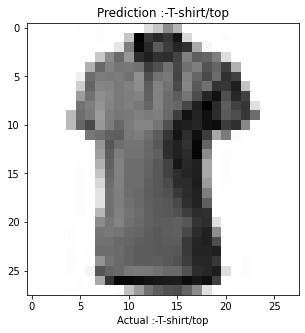

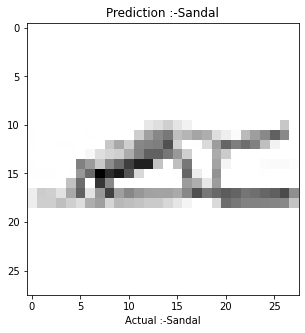

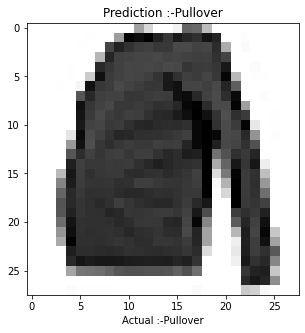

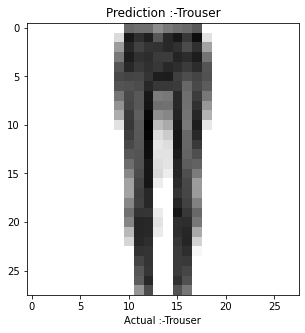

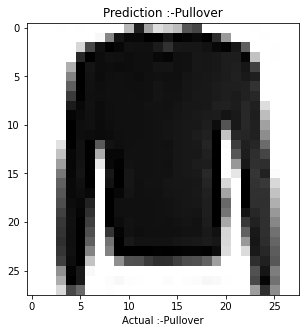

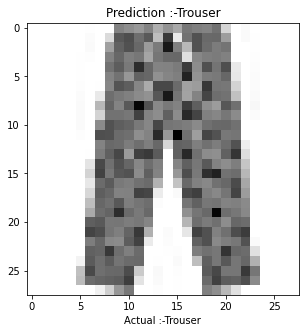

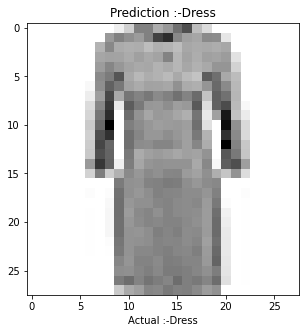

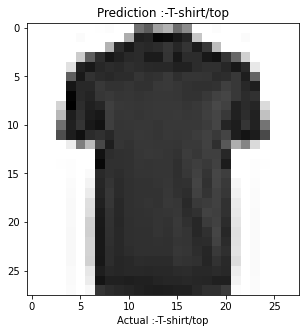

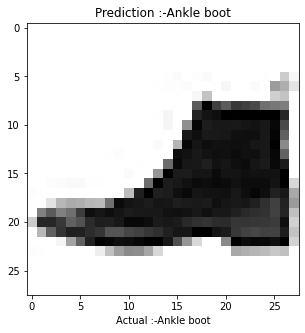

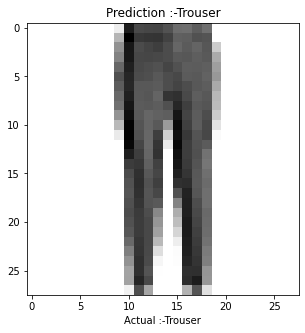

In [20]:
# visual prediction 

for i in range(170,180):
    plt.figure(figsize=(8,5))
    plt.imshow(np.reshape(test_images[i], (28,28)), cmap = plt.cm.binary)
    plt.xlabel("Actual :-" + class_name[test_labels[i]])
    plt.title("Prediction :-" + class_name[y_pred[i]])
    plt.show()

# **-----------------------------------Keep learning, Keep improving-----------------------------**